<a href="https://colab.research.google.com/github/idAryan/ML_Codes/blob/main/Capstone/end_toend_heart_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Predicting heart disease using machine learning

This notebook looks into using various pytohn based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We' re going to take the following approach:
1.Problem defination

2.Data

3.Evaluation

4.Features

5.Modelling

6.Experimentation

## 1.Problem Defination
In a statement,
> Given clinical parameters about a patient , can we predict whether or not they have heart disease?

## 2. Data
The original data come from uci directory https://archive.ics.uci.edu/dataset/45/heart+disease and can be downloaded from kaggle https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3.Evaluation
> If we can reach 95% accuracy at predicting wehter or not patient has heart disease during the proof of concept we'll pursue the project.

## 4.Features
This is where you'll get different information about each of the features in your data.
**Create data dictionary**



## Preparing the tools
We're going to use pandas matlplotlib and numpy for data analysis and manipulation

In [ ]:
!conda install -c anaconda seaborn -y

Channels:
 - anaconda
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/aryansharma/Music/capstone/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py312h06a4308_0         607 KB  anaconda
    ------------------------------------------------------------
                                           Total:         607 KB

The following NEW packages will be INSTALLED:

  seaborn            anaconda/linux-64::seaborn-0.12.2-py312h06a4308_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [ ]:
#Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# we want our plots to appear inside the notebook

# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [ ]:
df=pd.read_csv("heart-disease.csv")
df.shape  #(rows, columns)

(303, 14)

## Data Exploration (Exploratory data analysis or EDA)

The goal here to is to find out more about the data and become a subject matter expert on the dataset you're working with.

1.What questions(s) are you trying to solve?

2.What kind of data do we have and how do we treat different types?

3.What's missing fro mthe data andd how do you deal with it?

4.Where are the outliers and why should you care about them?

5.How can you add, change or remove features to get more out of data?


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

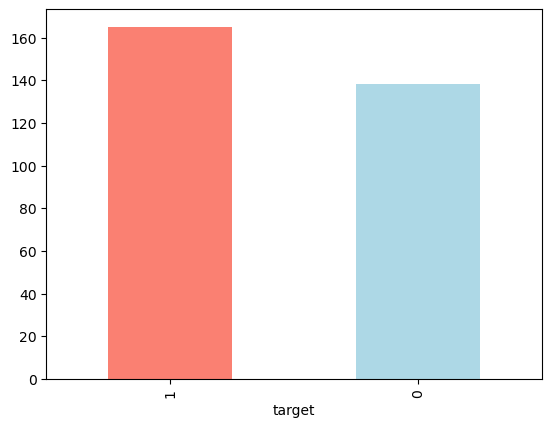

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

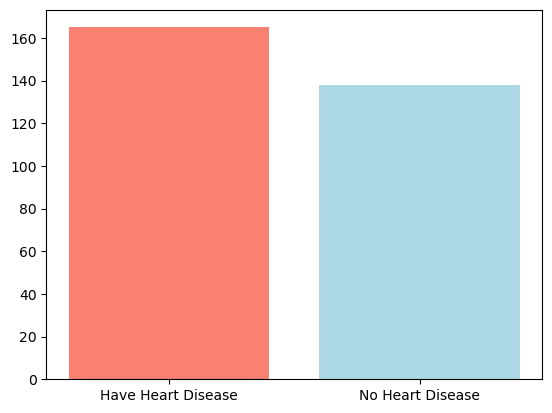

In [ ]:

fig,ax =plt.subplots()
name=['Have Heart Disease','No Heart Disease']
bar_colors=['salmon','lightblue']
counts=df["target"].value_counts()
ax.bar(name,counts,color=bar_colors);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to Sex

In [ ]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
pd.crosstab(df.target,df.sex)
#Here it means that 72 female are positive in heart disease and 93 male are positive with heart disease.
#24 females have no heart disease and 114 males have no heart disease
#Women have 75 % chance that she have heart disease while men nearly have 45 percent chace that he have heart disease based on the present data.

sex,0,1
target,,
0,24,114
1,72,93


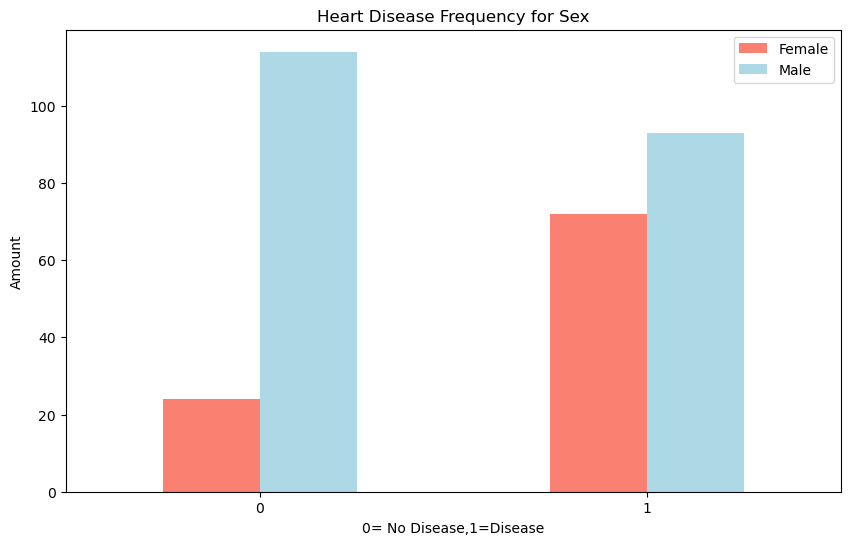

In [ ]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [ ]:
pd.crosstab(df.target, df.sex).value_counts

<bound method DataFrame.value_counts of sex      0    1
target         
0       24  114
1       72   93>

<BarContainer object of 2 artists>

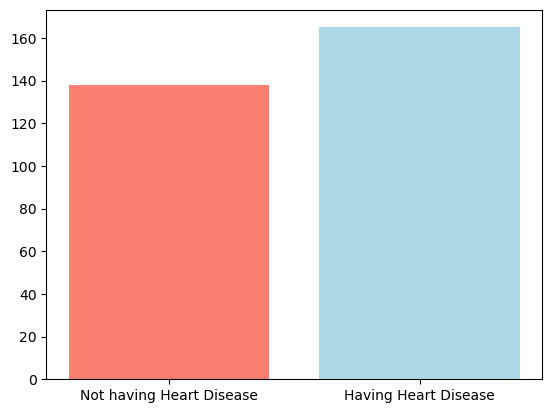

In [ ]:
fig,ax=plt.subplots()
name=['Not having Heart Disease','Having Heart Disease']
bar_color=['salmon','lightblue']
count=pd.crosstab(df.target,df.sex).sum(axis=1)
plt.bar(name,count,color=bar_color)

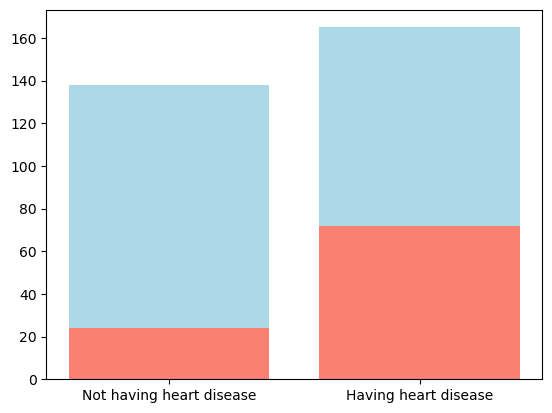

In [ ]:
fig,ax=plt.subplots()
name=['Not having heart disease','Having heart disease']
bar_color=['salmon','lightblue']
count=pd.crosstab(df.target,df.sex).values
ax.bar(name,count[:,0],color=bar_color[0])
ax.bar(name,count[:,1],color=bar_color[1],bottom=count[:,0]);

#Female have less number of heart disease but still the ratio of having heart disease and having no heart disease is higher

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df["thalach"].value_counts()
#Length 91 means there are 91 possible different values
pd.crosstab(df["thalach"],df["target"])
#There are so many different value of thalach and it is not suitable to put on the bar graph

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


In [ ]:
df["target"].value_counts
#suitable for bar graph
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## Age vs Max Heart Rate for heart disease

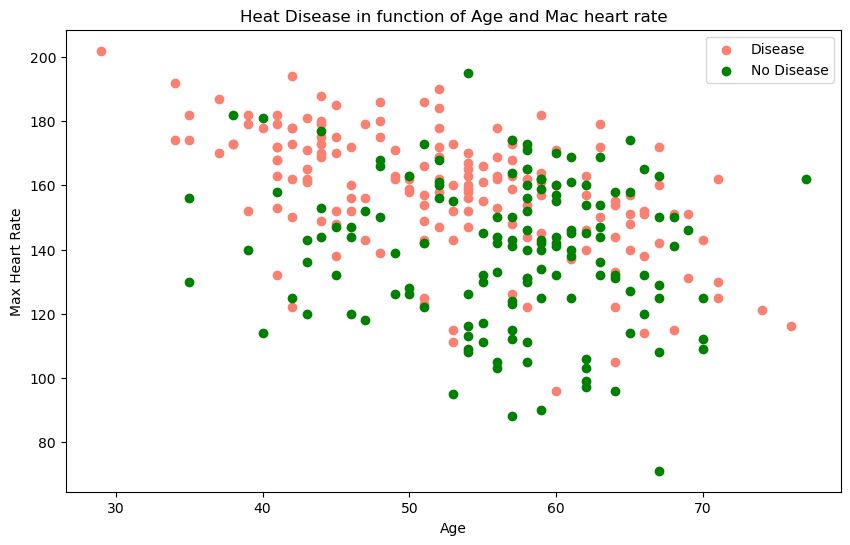

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color='salmon')

#Scatter with negative examples
#plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color='green')

#Add some helpful info
plt.title("Heat Disease in function of Age and Mac heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);